 # ***Boston Median Home Value Neural Network Regression Predictive Model*** 
 # ***Created by Matt Boraske on 12/16/22***
 
 <br>

 # The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980.   N.B. Various transformations are used in the table on pages 244-261 of the latter.

<br>

 ## This is a dataset taken from the StatLib library which is maintained at Carnegie Mellon University. It is publically available at http://lib.stat.cmu.edu/datasets/boston

<br>

 ## **Training variables in order:**
 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per $10,000
 
 - PTRATIO  pupil-teacher ratio by town
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT    % lower status of the population


 ## **Testing variable that the model predicts**
 - MEDV     Median value of owner-occupied homes in $1000's

 <br>

#Import libraries

In [104]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from google.colab import files

#Import data

In [105]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

print(x_train.shape)
print(y_train.shape)
print("\n")
print(x_test.shape)
print(y_test.shape)

trainingFeatures = pd.DataFrame(x_train)
print(trainingFeatures.head())

print("\n")

trainingLabels = pd.DataFrame(y_train)
print(trainingLabels.head())

(404, 13)
(404,)


(102, 13)
(102,)
        0     1      2    3      4      5      6       7     8      9     10  \
0  1.23247   0.0   8.14  0.0  0.538  6.142   91.7  3.9769   4.0  307.0  21.0   
1  0.02177  82.5   2.03  0.0  0.415  7.610   15.7  6.2700   2.0  348.0  14.7   
2  4.89822   0.0  18.10  0.0  0.631  4.970  100.0  1.3325  24.0  666.0  20.2   
3  0.03961   0.0   5.19  0.0  0.515  6.037   34.5  5.9853   5.0  224.0  20.2   
4  3.69311   0.0  18.10  0.0  0.713  6.376   88.4  2.5671  24.0  666.0  20.2   

       11     12  
0  396.90  18.72  
1  395.38   3.11  
2  375.52   3.26  
3  396.90   8.01  
4  391.43  14.65  


      0
0  15.2
1  42.3
2  50.0
3  21.1
4  17.7


#Normalize Data

In [106]:
#instantiate column transformer
ct = make_column_transformer(
    (MinMaxScaler(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]),
)

#fit column transformer
ct.fit(x_train)

#create normalized training and testing data
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

#inspect normalized data
trainingData_normalized = pd.DataFrame(x_train_normal)
print(trainingData_normalized)

testingData_normalized = pd.DataFrame(x_test_normal)
print(testingData_normalized)

           0      1         2    3         4         5         6         7   \
0    0.013782  0.000  0.281525  0.0  0.314815  0.499806  0.914521  0.297191   
1    0.000174  0.825  0.057551  0.0  0.061728  0.784082  0.131823  0.536537   
2    0.054984  0.000  0.646628  0.0  0.506173  0.272851  1.000000  0.021178   
3    0.000374  0.000  0.173387  0.0  0.267490  0.479473  0.325438  0.506821   
4    0.041439  0.000  0.646628  0.0  0.674897  0.545120  0.880536  0.150041   
..        ...    ...       ...  ...       ...       ...       ...       ...   
399  0.002399  0.000  0.236437  0.0  0.129630  0.395236  0.608651  0.517509   
400  0.001751  0.200  0.238270  0.0  0.162551  0.518784  0.138002  0.344380   
401  0.000319  0.350  0.205279  0.0  0.108848  0.478311  0.210093  0.575229   
402  0.024085  0.000  0.700880  0.0  1.000000  0.415957  0.984552  0.051520   
403  0.000091  0.600  0.090543  0.0  0.032922  0.589272  0.163749  0.531276   

           8         9         10        11        

# Create and Fit Model

In [107]:
#set random seed
tf.random.set_seed(42)

#build the model (3 layers -- 100, 10, and 1 unit(s))
boston_housing_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
boston_housing_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(0.025),
    metrics=['mae']
)

#fit model on 250 epochs
history = boston_housing_model.fit(x_train_normal, y_train, epochs = 250, verbose = 0)

# Evaluate Model

In [108]:
boston_housing_model_loss, boston_housing_model_mae = boston_housing_model.evaluate(x_test_normal, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.1079 - mae: 3.1079


# Model Loss Plot

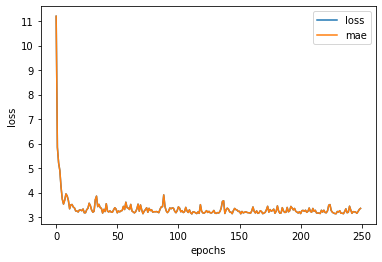

In [109]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

#Model Predictions

In [110]:
y_preds = boston_housing_model.predict(x_test_normal)
error = y_preds.squeeze() - y_test

4/4 [==============================] - 0s 4ms/step


#Model Error Plot

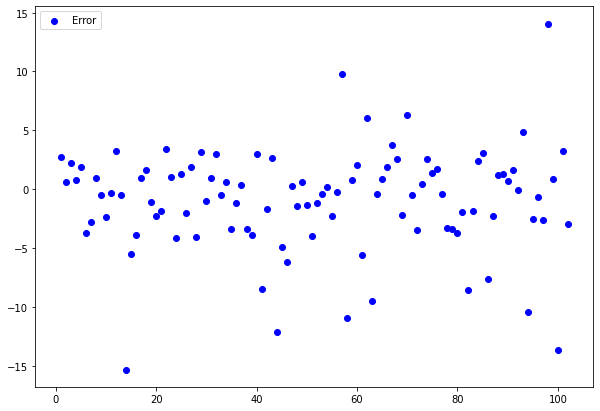

In [111]:
error = y_preds.squeeze() - y_test
axis_marks = list(range(1,103))
plt.figure(figsize=(10, 7))
plt.scatter(axis_marks, error, c="b", label="Error")
plt.legend()

# Save and download model

In [112]:
boston_housing_model.save('boston_housing_model.h5')
files.download("boston_housing_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>